#전처리 (개인)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

Saving Life-Expectancy-Data-Updated.csv to Life-Expectancy-Data-Updated (1).csv


In [ ]:
# 불필요한 컬럼 제거
df = df.drop(columns=["Measles", "Incidents_HIV"])

# 로그 변환 대상 컬럼
log_cols = ["GDP_per_capita", "Population_mln", "Adult_mortality", "Infant_deaths", "Under_five_deaths"]

# 0 포함 여부 확인 및 로그 변환
for col in log_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: 0의 개수 = {zero_count}")

    if zero_count == 0:
        df[f"log_{col}"] = np.log(df[col])
    else:
        print(f"{col} 컬럼에 0이 있어서 np.log() 변환하지 않음")

df.head()

GDP_per_capita: 0의 개수 = 0
Population_mln: 0의 개수 = 0
Adult_mortality: 0의 개수 = 0
Infant_deaths: 0의 개수 = 0
Under_five_deaths: 0의 개수 = 0


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,BMI,Polio,...,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,log_GDP_per_capita,log_Population_mln,log_Adult_mortality,log_Infant_deaths,log_Under_five_deaths
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,27.8,97,...,4.8,7.8,0,1,76.5,9.306196,4.363481,4.661777,2.406945,2.564949
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,26.0,97,...,0.5,9.7,1,0,82.8,10.155879,3.838161,4.058761,0.993252,1.193922
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,21.2,67,...,28.0,5.0,0,1,65.4,6.981006,7.075986,5.303685,3.941582,4.218036
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,25.3,92,...,5.5,7.9,0,1,67.0,8.329899,-0.287682,5.403562,3.490429,3.701302
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,27.0,94,...,1.1,12.8,1,0,81.7,10.433969,2.068128,4.059598,1.223775,1.458615


In [ ]:
# 스케일링 제외 컬럼
exclude_cols = ["Country", "Region", "Year", "Life_expectancy"]
exclude_cols += [col for col in df.columns if col.startswith("log_")]

# 스케일링 대상 컬럼 자동 선택
scale_cols = df.select_dtypes(include=["int64", "float64"]).columns
scale_cols = [col for col in scale_cols if col not in exclude_cols]

# 스케일링
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("스케일링 완료 컬럼 수:", len(scale_cols))
df.head()


스케일링 완료 컬럼 수: 15


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,BMI,Polio,...,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,log_GDP_per_capita,log_Population_mln,log_Adult_mortality,log_Infant_deaths,log_Under_five_deaths
0,Turkiye,Middle East,2015,-0.699654,-0.671831,-0.752264,-0.879342,0.794574,1.261475,0.696414,...,-0.022064,0.052941,-0.510454,0.510454,76.5,9.306196,4.363481,4.661777,2.406945,2.564949
1,Spain,European Union,2015,-1.004739,-0.889504,-1.169371,1.388788,0.794574,0.440877,0.696414,...,-0.972460,0.652121,1.959040,-1.959040,82.8,10.155879,3.838161,4.058761,0.993252,1.193922
2,India,Asia,2007,0.767660,0.560155,0.076810,-0.816547,-1.518979,-1.747384,-1.293275,...,5.105658,-0.830060,-0.510454,0.510454,65.4,6.981006,7.075986,5.303685,3.941582,4.218036
3,Guyana,South America,2006,0.088482,-0.054716,0.260638,0.215791,0.544460,0.121756,0.364800,...,0.132652,0.084477,-0.510454,0.510454,67.0,8.329899,-0.287682,5.403562,3.490429,3.701302
4,Israel,Middle East,2012,-0.979315,-0.867064,-1.168949,-0.484993,0.794574,0.896765,0.497445,...,-0.839847,1.629730,1.959040,-1.959040,81.7,10.433969,2.068128,4.059598,1.223775,1.458615


In [ ]:
df.to_csv("processed_life_expectancy.csv", index=False)

#가설 검정

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

Saving Life-Expectancy-Data-Updated.csv to Life-Expectancy-Data-Updated.csv


In [ ]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


<Axes: xlabel='Life_expectancy', ylabel='Count'>

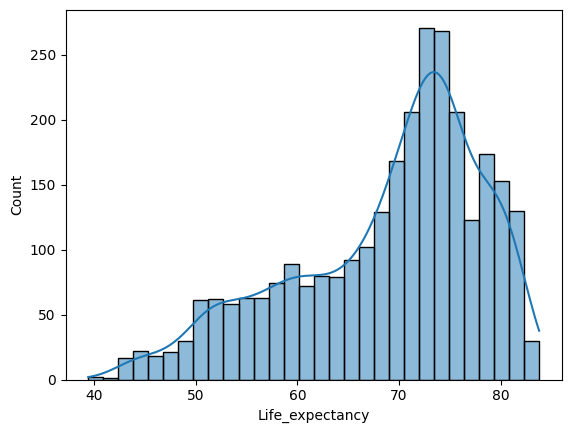

In [ ]:
# 기대수명 분포
sns.histplot(df['Life_expectancy'], kde=True, bins=30)

<Axes: xlabel='Polio', ylabel='Life_expectancy'>

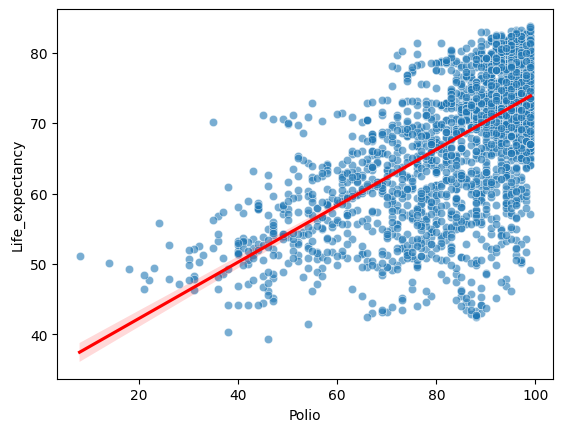

In [ ]:
# 예방접종률 vs 기대수명 (Hepatitis_B/ Polio/ Diphteria) : 각각 비교 + 3개 합산 비교

# 1. Polio vs 기대수명
sns.scatterplot(x='Polio', y='Life_expectancy', data=df, alpha=0.6)
sns.regplot(x='Polio', y='Life_expectancy', data=df, scatter=False, color='red')

<Axes: xlabel='Hepatitis_B', ylabel='Life_expectancy'>

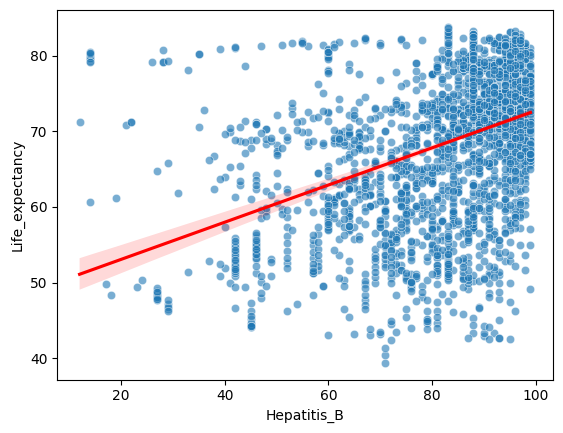

In [ ]:
# 2. Hepatitis_B vs 기대수명
sns.scatterplot(x='Hepatitis_B', y='Life_expectancy', data=df, alpha=0.6)
sns.regplot(x='Hepatitis_B', y='Life_expectancy', data=df, scatter=False, color='red')

<Axes: xlabel='Diphtheria', ylabel='Life_expectancy'>

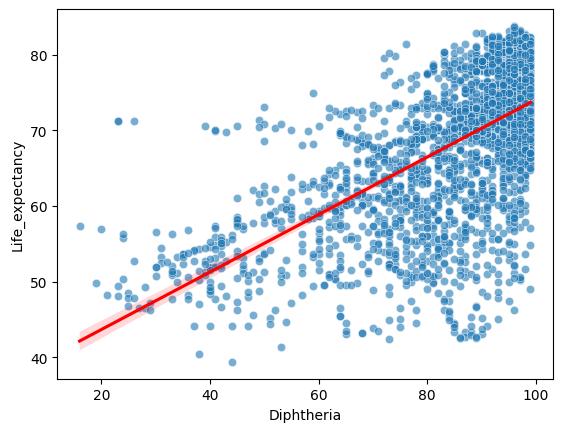

In [ ]:
# 3. Diphtheria vs 기대수명
sns.scatterplot(x='Diphtheria', y='Life_expectancy', data=df, alpha=0.6)
sns.regplot(x='Diphtheria', y='Life_expectancy', data=df, scatter=False, color='red')

<Axes: xlabel='Mean_Vaccine_Coverage', ylabel='Life_expectancy'>

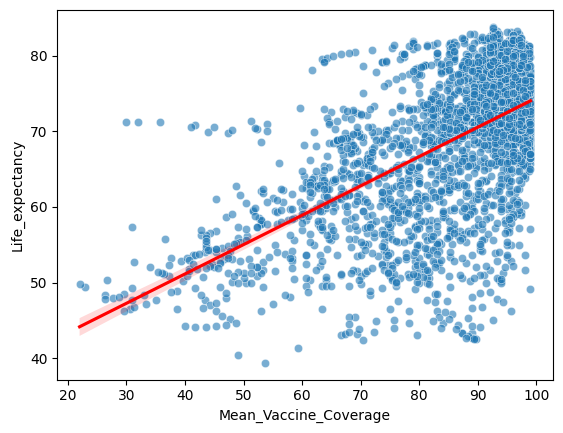

In [ ]:
# 평균 예방접종률 vs 기대수명
df['Mean_Vaccine_Coverage'] = df[['Polio', 'Hepatitis_B', 'Diphtheria']].mean(axis=1)

sns.scatterplot(x='Mean_Vaccine_Coverage', y='Life_expectancy', data=df, alpha=0.6)
sns.regplot(x='Mean_Vaccine_Coverage', y='Life_expectancy', data=df, scatter=False, color='red')

#자료 정리 중 궁금증

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

Saving real_processed_life data_final.csv to real_processed_life data_final.csv


#"Schooling(교육 연수), Alcohol consumption(알코올 소비량)이 증가하면 기대수명이 올라가는가?"

In [ ]:
df[['Schooling', 'Alcohol_consumption', 'Life_expectancy']].corr()

,Schooling,Alcohol_consumption,Life_expectancy
Schooling,1.000000,0.619306,0.735069
Alcohol_consumption,0.619306,1.000000,0.403767
Life_expectancy,0.735069,0.403767,1.000000


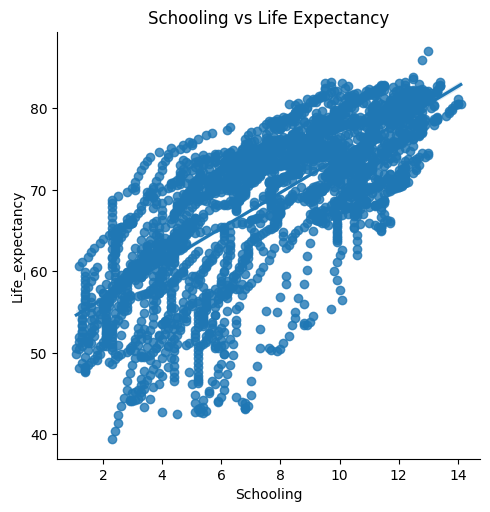

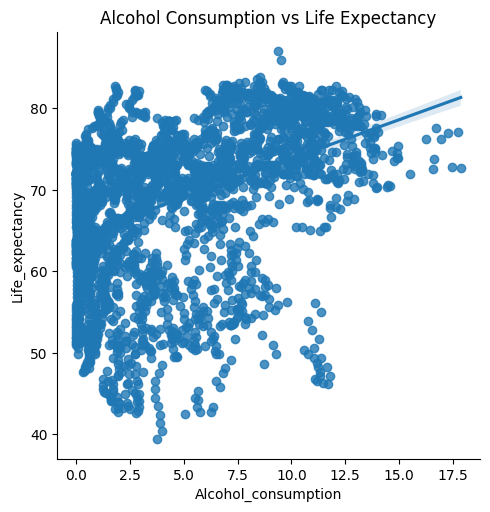

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Schooling vs 기대수명
sns.lmplot(data=df, x='Schooling', y='Life_expectancy')
plt.title("Schooling vs Life Expectancy")
plt.show()

# Alcohol_consumption vs 기대수명
sns.lmplot(data=df, x='Alcohol_consumption', y='Life_expectancy')
plt.title("Alcohol Consumption vs Life Expectancy")
plt.show()

In [ ]:
import statsmodels.api as sm

X = df[['Schooling', 'Alcohol_consumption']]
y = df['Life_expectancy']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     1720.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        06:15:25   Log-Likelihood:                -9413.3
No. Observations:                2880   AIC:                         1.883e+04
Df Residuals:                    2877   BIC:                         1.885e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.0462    

#모델링 (선형회귀 & 랜덤포레스트)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 데이터 불러오기
df = pd.read_csv('processed_life data_final.csv')

# 제거 & 타겟
excluded_cols = ['Country', 'Region', 'Year', 'GDP_per_capita']
target = 'Life_expectancy'

# 독립변수(X)
X = df.drop(columns=excluded_cols + [target], errors='ignore')
y = df[target]


# 학습용/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 회귀 계수 확인
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)

Mean Squared Error: 1.4118205542331337
R² Score: 0.9841353842556407
                        Feature  Coefficient
18          log_Adult_mortality    -3.957266
16           log_GDP_per_capita     0.244394
17           log_Population_mln     0.178135
3           Alcohol_consumption     0.130986
9                 Incidents_HIV    -0.106705
6                           BMI    -0.077222
1             Under_five_deaths    -0.074068
14     Economy_status_Developed    -0.046247
15    Economy_status_Developing     0.046247
13                    Schooling     0.037467
2               Adult_mortality    -0.028598
11  Thinness_ten_nineteen_years    -0.027312
12     Thinness_five_nine_years     0.016102
0                 Infant_deaths    -0.014470
7                         Polio     0.009443
8                    Diphtheria    -0.005315
4                   Hepatitis_B    -0.004064
10               Population_mln    -0.001384
5                       Measles    -0.001300


# 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 불러오기
df = pd.read_csv('processed_life data_final.csv')

# 제외할 컬럼 설정 및 데이터 준비
excluded_cols = ['Country', 'Region', 'Year', 'GDP_per_capita']
target = 'Life_expectancy'

X = df.drop(columns=excluded_cols + [target], errors='ignore')
y = df[target]

# 결측치 제거
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=[target])
y = data[target]

# 학습/테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("Random Forest - Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Random Forest - R² Score:", r2_score(y_test, y_pred))

# 변수 중요도 확인
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

Random Forest - Mean Squared Error: 0.2915237638888873
Random Forest - R² Score: 0.9967241499066015
                        Feature  Importance
1             Under_five_deaths    0.748051
18          log_Adult_mortality    0.123911
2               Adult_mortality    0.097777
0                 Infant_deaths    0.014560
3           Alcohol_consumption    0.002301
16           log_GDP_per_capita    0.002158
9                 Incidents_HIV    0.001677
13                    Schooling    0.001592
6                           BMI    0.001548
10               Population_mln    0.001286
17           log_Population_mln    0.001281
12     Thinness_five_nine_years    0.000871
11  Thinness_ten_nineteen_years    0.000813
5                       Measles    0.000690
4                   Hepatitis_B    0.000515
7                         Polio    0.000468
8                    Diphtheria    0.000412
15    Economy_status_Developing    0.000063
14     Economy_status_Developed    0.000026


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('processed_life data_final.csv')

# 제외할 컬럼 설정 및 데이터 준비
excluded_cols = ['Country', 'Region', 'Year', 'GDP_per_capita']
target = 'Life_expectancy'

X = df.drop(columns=excluded_cols + [target], errors='ignore')
y = df[target]

# 결측치 제거
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=[target])
y = data[target]

# 학습/테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 출력
print(f"Random Forest 결과:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# 변수 중요도 확인
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importances)

Random Forest 결과:
MAE: 0.387
MSE: 0.292
R² Score: 0.997
Feature Importances:
                        Feature  Importance
1             Under_five_deaths    0.748051
18          log_Adult_mortality    0.123911
2               Adult_mortality    0.097777
0                 Infant_deaths    0.014560
3           Alcohol_consumption    0.002301
16           log_GDP_per_capita    0.002158
9                 Incidents_HIV    0.001677
13                    Schooling    0.001592
6                           BMI    0.001548
10               Population_mln    0.001286
17           log_Population_mln    0.001281
12     Thinness_five_nine_years    0.000871
11  Thinness_ten_nineteen_years    0.000813
5                       Measles    0.000690
4                   Hepatitis_B    0.000515
7                         Polio    0.000468
8                    Diphtheria    0.000412
15    Economy_status_Developing    0.000063
14     Economy_status_Developed    0.000026


#머신러닝_1

Permutation Importance 상위 피처:
Under_five_deaths      0.402699
log_Adult_mortality    0.118197
Adult_mortality        0.094964
Infant_deaths          0.015641
Alcohol_consumption    0.002644
Incidents_HIV          0.001880
Schooling              0.001441
BMI                    0.001413
Year                   0.001337
log_GDP_per_capita     0.001192
dtype: float64


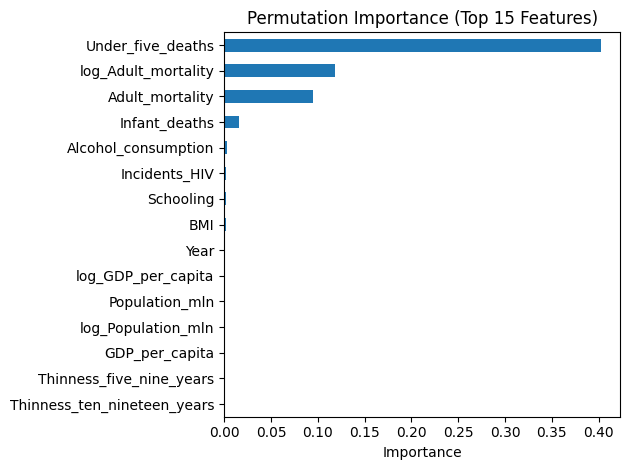

In [ ]:
# Permutation Importance

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# Permutation Importance 계산
perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# 시리즈 형태로 정리
importances = pd.Series(perm.importances_mean, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# 상위 중요 변수 출력
print("Permutation Importance 상위 피처:")
print(importances_sorted.head(10))

# 시각화
importances_sorted.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Permutation Importance (Top 15 Features)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# RFE

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 피처와 타겟 분리
X = df.select_dtypes(include='number').drop(columns=['Life_expectancy'])
y = df['Life_expectancy']

# 모델 정의 (랜덤 포레스트 기반 RFE 사용)
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # 원하는 피처 수 조절 가능
rfe.fit(X, y)

# 선택된 피처 보기
selected_features = X.columns[rfe.support_]
print("선택된 피처 목록:")
print(selected_features)

선택된 피처 목록:
Index(['Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'BMI', 'Incidents_HIV', 'GDP_per_capita',
       'Schooling', 'log_Population_mln', 'log_Adult_mortality'],
      dtype='object')


# 컬럼 제거 후 다시 랜덤포레스트 돌려보기 (제거: 'Country', 'Region', 'Year', 'GDP_per_capita', 'Adult_mortality', 'Infant_deaths')

MAE: 0.385
R² Score: 0.997


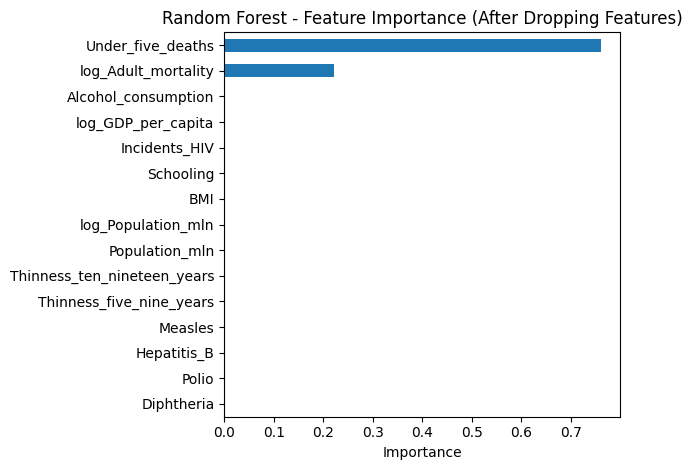

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 제거할 변수 목록
drop_cols = ['Country', 'Region', 'Year', 'GDP_per_capita', 'Adult_mortality', 'Infant_deaths']

# 피처와 타겟 분리
X = df.drop(columns=drop_cols + ['Life_expectancy'])  # 타겟도 같이 제외
y = df['Life_expectancy']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")

# 피처 중요도 시각화
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# 상위 15개 시각화
importances_sorted.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Random Forest - Feature Importance (After Dropping Features)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# 해석 중심 모델 (Lasso, Ridge, Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# 사용할 변수 설정
drop_cols = ['Country', 'Region', 'Year', 'GDP_per_capita', 'Adult_mortality', 'Infant_deaths']
X = df.drop(columns=drop_cols + ['Life_expectancy'])
y = df['Life_expectancy']

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 정의
models = {
    "LinearRegression": LinearRegression(),
    "LassoCV": LassoCV(cv=5, random_state=42),
    "RidgeCV": RidgeCV(cv=5)
}

# 결과 저장용
results = {}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "model": model,
        "MAE": mae,
        "R2": r2
    }
    print(f"{name} 결과:")
    print(f"  MAE: {mae:.3f}")
    print(f"  R²: {r2:.3f}\n")

# 회귀계수 출력 (Lasso 기준)
coef_series = pd.Series(models['LassoCV'].coef_, index=X.columns)
print("Lasso 회귀 계수 (변수 중요도):")
print(coef_series.sort_values(ascending=False))

LinearRegression 결과:
  MAE: 1.013
  R²: 0.981

LassoCV 결과:
  MAE: 1.011
  R²: 0.981

RidgeCV 결과:
  MAE: 1.013
  R²: 0.981

Lasso 회귀 계수 (변수 중요도):
Alcohol_consumption            0.631631
log_Population_mln             0.269957
log_GDP_per_capita             0.093757
Thinness_five_nine_years       0.076339
Economy_status_Developing      0.000000
Diphtheria                    -0.000000
BMI                           -0.000000
Polio                          0.000000
Schooling                     -0.000329
Thinness_ten_nineteen_years   -0.015174
Measles                       -0.018689
Hepatitis_B                   -0.032073
Population_mln                -0.137889
Economy_status_Developed      -0.165272
Incidents_HIV                 -1.076815
Under_five_deaths             -4.382741
log_Adult_mortality           -4.651164
dtype: float64


# 클러스터링(KMeans)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 변수 선택
cluster_features = ['log_Adult_mortality', 'Under_five_deaths', 'Incidents_HIV']
cluster_data = df[cluster_features]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_data)

# 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터별 주요 변수 평균값 비교
summary = df.groupby('cluster')[['Life_expectancy', 'log_GDP_per_capita', 'Schooling', 'Alcohol_consumption']].mean().round(2)
print("클러스터별 평균 비교:")
print(summary)


클러스터별 평균 비교:
         Life_expectancy  log_GDP_per_capita  Schooling  Alcohol_consumption
cluster                                                                     
0                  74.20                9.04       9.10                 5.76
1                  49.44                7.66       6.59                 4.40
2                  57.56                6.86       4.06                 2.56


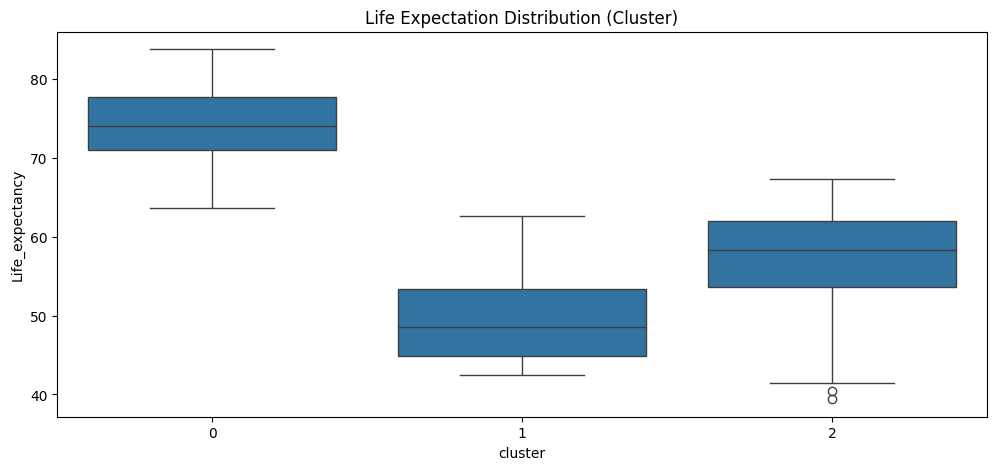

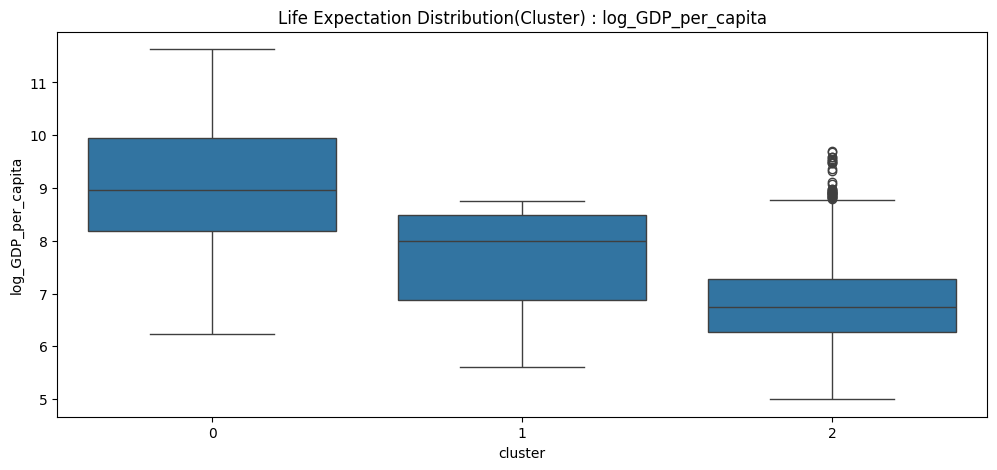

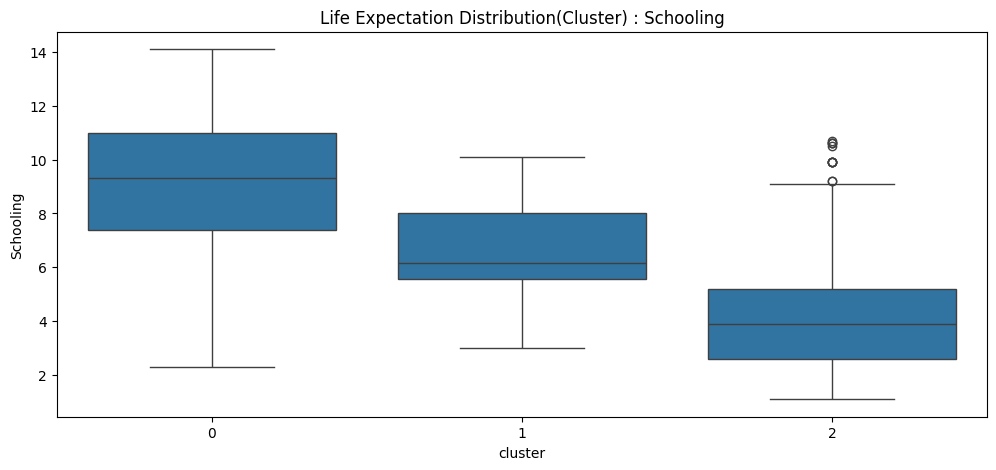

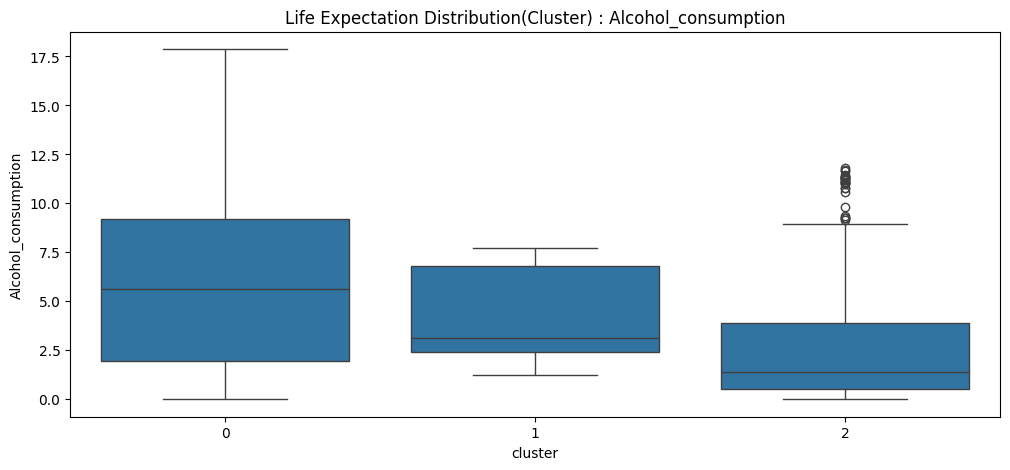

In [ ]:
# 시각화: 클러스터별 기대수명 + 주요 변수 박스플롯
plt.figure(figsize=(12, 5))
sns.boxplot(x='cluster', y='Life_expectancy', data=df)
plt.title('Life Expectation Distribution (Cluster)')
plt.show()

for col in ['log_GDP_per_capita', 'Schooling', 'Alcohol_consumption']:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(f'Life Expectation Distribution(Cluster) : {col}')
    plt.show()

In [ ]:
# 클러스터링 파일 저장
df.to_csv('clustered_data.csv', index=False)

In [ ]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv('clustered_data.csv')

In [ ]:
# 클러스터별 포함 국가 목록 정리
clustered_countries = df.groupby('cluster')['Country'].unique().apply(list)
clustered_countries_count = clustered_countries.apply(len)

# 클러스터별 국가 수 및 일부 예시 출력용 데이터프레임 생성
cluster_summary = pd.DataFrame({
    'Number_of_Countries': clustered_countries_count,
    'Example_Countries': clustered_countries.apply(lambda x: x[:5])  # 상위 5개만 예시로
})

# 결과 보기
display(cluster_summary)

,Number_of_Countries,Example_Countries
cluster,,
0,134,"[Albania, Algeria, Antigua and Barbuda, Argent..."
1,8,"[Botswana, Eswatini, Lesotho, Malawi, Namibia]"
2,61,"[Afghanistan, Angola, Azerbaijan, Bangladesh, ..."


Cluster 0: 전반적으로 가장 높은 기대수명, GDP, 교육 수준, 음주량을 보임 → 선진국 그룹일 가능성 높음

Cluster 1: 기대수명이 가장 낮고, 다른 변수들도 중간 정도 수준 → 저개발 국가 그룹 또는 복합 특성 보유 국가

Cluster 2: 기대수명은 1보다 약간 높지만, GDP, 교육 수준, 음주량 모두 낮음 → 소득 낮고 교육 수준 낮은 군

In [ ]:
print(df.columns)

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy', 'log_GDP_per_capita',
       'log_Population_mln', 'log_Adult_mortality', 'cluster'],
      dtype='object')


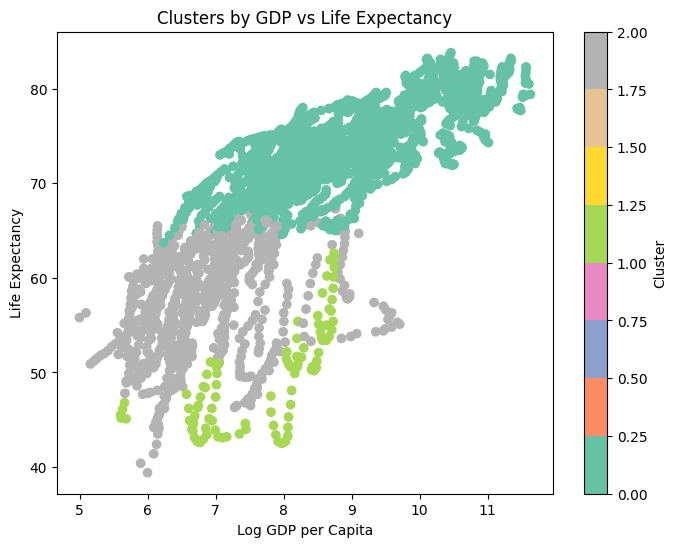

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['log_GDP_per_capita'], df['Life_expectancy'], c=df['cluster'], cmap='Set2')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Clusters by GDP vs Life Expectancy')
plt.colorbar(label='Cluster')
plt.show()

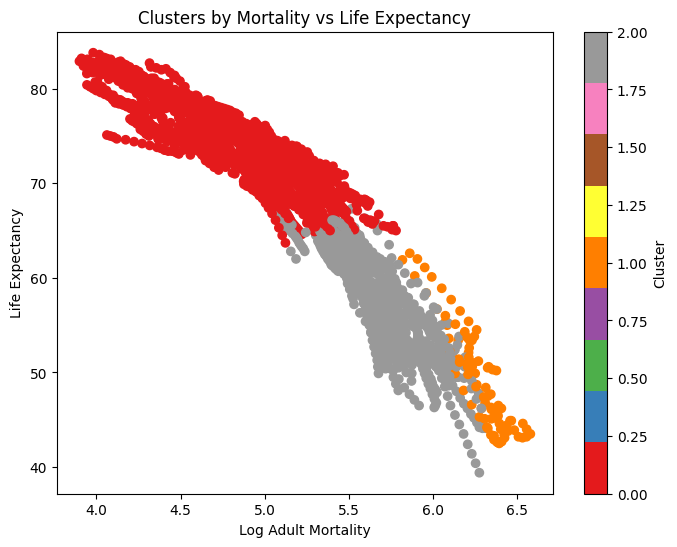

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['log_Adult_mortality'], df['Life_expectancy'], c=df['cluster'], cmap='Set1')
plt.xlabel('Log Adult Mortality')
plt.ylabel('Life Expectancy')
plt.title('Clusters by Mortality vs Life Expectancy')
plt.colorbar(label='Cluster')
plt.show()

# 클러스터를 모델 피처로 추가

## 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 클러스터 변수 추가
X_with_cluster = df.drop(columns=['Country', 'Region', 'Year', 'GDP_per_capita', 'Adult_mortality', 'Infant_deaths', 'Life_expectancy'])
y = df['Life_expectancy']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"클러스터 피처 추가 후 모델 성능:")
print(f"  MAE: {mae:.3f}")
print(f"  R²: {r2:.3f}")


클러스터 피처 추가 후 모델 성능:
  MAE: 0.377
  R²: 0.997


MAE 미세하게 감소


 클러스터 0 모델 학습
  MAE: 0.315
  R²: 0.990


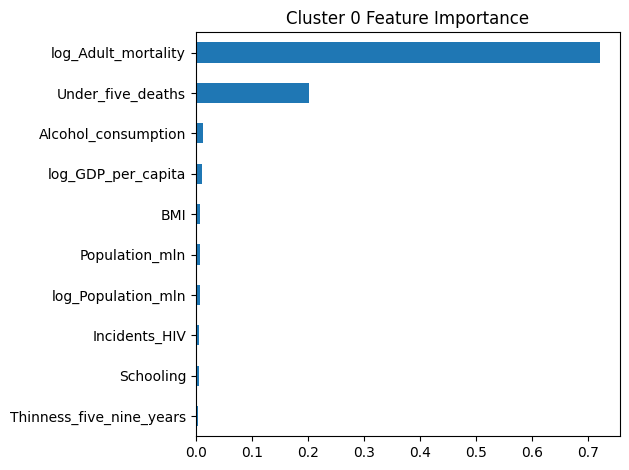


 클러스터 1 모델 학습
  MAE: 1.002
  R²: 0.952


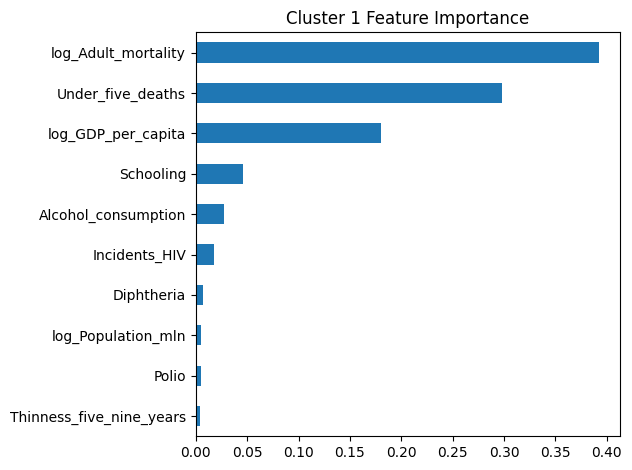


 클러스터 2 모델 학습
  MAE: 0.530
  R²: 0.974


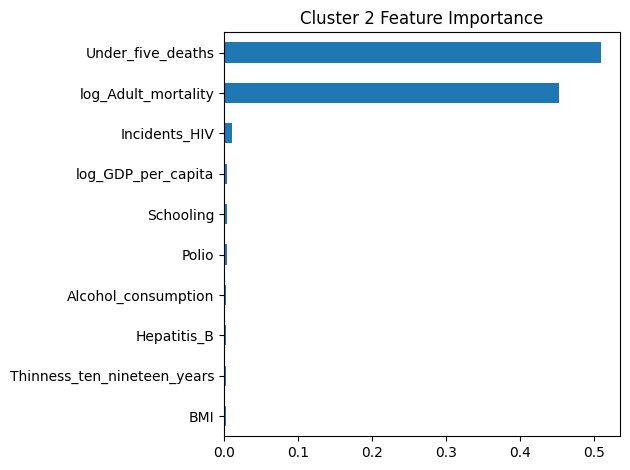

In [ ]:
# 클러스터별로 Random Forest 따로 학습
from sklearn.ensemble import RandomForestRegressor

for c in sorted(df['cluster'].unique()):
    print(f"\n 클러스터 {c} 모델 학습")

    cluster_df = df[df['cluster'] == c]
    X = cluster_df.drop(columns=['Country', 'Region', 'Year', 'GDP_per_capita', 'Adult_mortality', 'Infant_deaths', 'Life_expectancy'])
    y = cluster_df['Life_expectancy']

    # 데이터 너무 적은 클러스터는 패스
    if len(X) < 30:
        print(f"데이터 수가 적어 학습 생략 ({len(X)}개)")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"  MAE: {mae:.3f}")
    print(f"  R²: {r2:.3f}")

    # 중요도 시각화
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances.sort_values(ascending=False).head(10).plot(kind='barh', title=f"Cluster {c} Feature Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

[Cluster 0]\
-기대수명 사망률 변수로만 설명됨 (다른 변수 영향 X)\
-저소득/고사망률 국가

[Cluster 1]\
-기대수명 소득, 교육 영향 有 (사회적 요인 반영 O)\
-중간 정도 경제, 보건 수준 국가

[Cluster 2]\
-보건 취약국

## XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 사용 변수: 클러스터 포함한 수치형 피처
X = df.drop(columns=['Country', 'Region', 'Year', 'GDP_per_capita', 'Adult_mortality', 'Infant_deaths', 'Life_expectancy'])
y = df['Life_expectancy']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = XGBRegressor(n_estimators=100, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost 성능 (클러스터 피처 포함):")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

XGBoost 성능 (클러스터 피처 포함):
MAE: 0.434
R²: 0.996


# 사망률 관련 컬럼 제거 후 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 제거할 변수 목록
drop_cols = ['Country', 'Region', 'Year', 'GDP_per_capita',
             'Adult_mortality', 'Infant_deaths', 'Under_five_deaths', 'log_Adult_mortality']

X = df.drop(columns=drop_cols + ['Life_expectancy'])
y = df['Life_expectancy']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"사망률 변수 제거 후:")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


사망률 변수 제거 후 성능:
MAE: 0.619
R²: 0.990


#머신러닝_2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('/content/cleaned_life_data.csv')

# 고민 전

In [ ]:
# 제거할 변수
drop_cols = ['Country', 'Region', 'Year', 'GDP_per_capita',  'Adult_mortality', 'Infant_deaths', 'log_Adult_mortality', 'Under_five_deaths']

In [ ]:
# 타겟/피처 분리
X = df.drop(columns=['Life_expectancy'])
y = df['Life_expectancy']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 랜덤 포레스트 모델
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} 평가 지표:")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred, squared=True))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("R²  :", r2_score(y_true, y_pred))

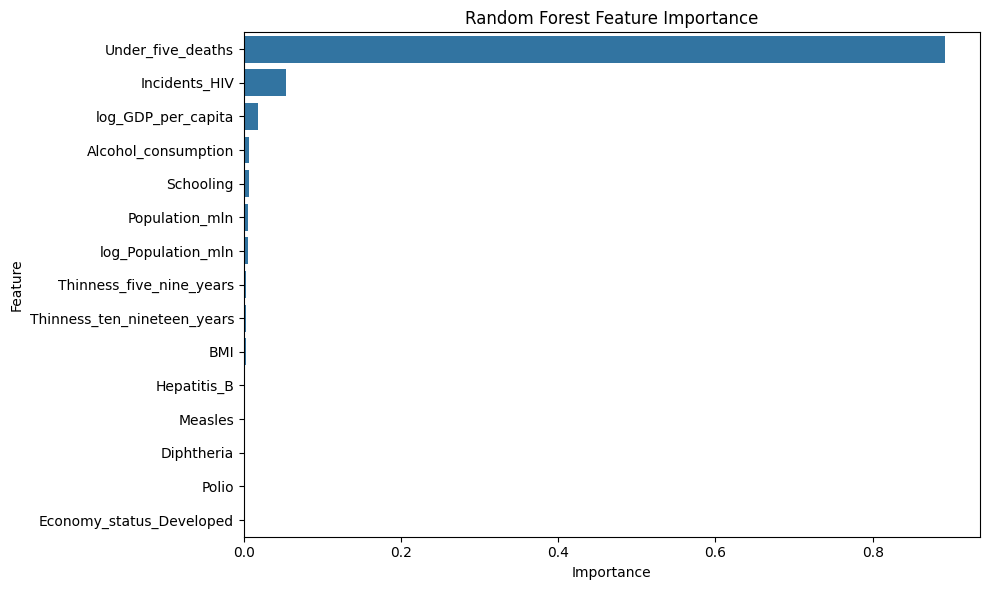

In [ ]:
# 포레스트 Feature Importance 시각화
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 고민 후

## 1. 국가 간 기대수명 격차 원인 분석

In [ ]:
df = pd.read_csv('/content/processed_life data_final.csv')

In [ ]:
# 국가 간 기대수명 격차 원인 분석
# 기준: 국가별 평균 기대수명 계산 → 상위 25%, 하위 25% 국가 분리

# 국가별 평균 기대수명 계산
country_life_mean = df.groupby("Country")["Life_expectancy"].mean().reset_index()
country_life_mean.columns = ["Country", "Avg_Life_Expectancy"]

# 사분위수 계산
q1 = country_life_mean["Avg_Life_Expectancy"].quantile(0.25)
q3 = country_life_mean["Avg_Life_Expectancy"].quantile(0.75)

# 상위 25%, 하위 25% 국가 리스트
low_life_countries = country_life_mean[country_life_mean["Avg_Life_Expectancy"] <= q1]["Country"]
high_life_countries = country_life_mean[country_life_mean["Avg_Life_Expectancy"] >= q3]["Country"]

# 원본 데이터에서 상/하위 국가에 해당하는 행 필터링
low_group = df[df["Country"].isin(low_life_countries)].copy()
high_group = df[df["Country"].isin(high_life_countries)].copy()

# 분석에 사용할 주요 변수 목록 (정책적 해석 가능한 변수 위주)
policy_vars = [
    "log_GDP_per_capita", "Schooling", "Hepatitis_B", "Measles",
    "BMI", "Thinness_ten_nineteen_years", "Alcohol_consumption"
]

# 상하위 그룹의 변수별 평균 계산
low_means = low_group[policy_vars].mean()
high_means = high_group[policy_vars].mean()

# 시각화를 위한 데이터프레임 변환
comparison_df = pd.DataFrame({
    "Variable": policy_vars,
    "Low_Life_Expectancy": low_means.values,
    "High_Life_Expectancy": high_means.values
})

# 차이 계산
comparison_df["Difference (High - Low)"] = comparison_df["High_Life_Expectancy"] - comparison_df["Low_Life_Expectancy"]


In [ ]:
print("상위 그룹 국가 수:", len(high_group))
print("하위 그룹 국가 수:", len(low_group))

상위 그룹 국가 수: 720
하위 그룹 국가 수: 720


In [ ]:
print(comparison_df.columns)

Index(['Variable', 'Low_Life_Expectancy', 'High_Life_Expectancy',
       'Difference (High - Low)'],
      dtype='object')


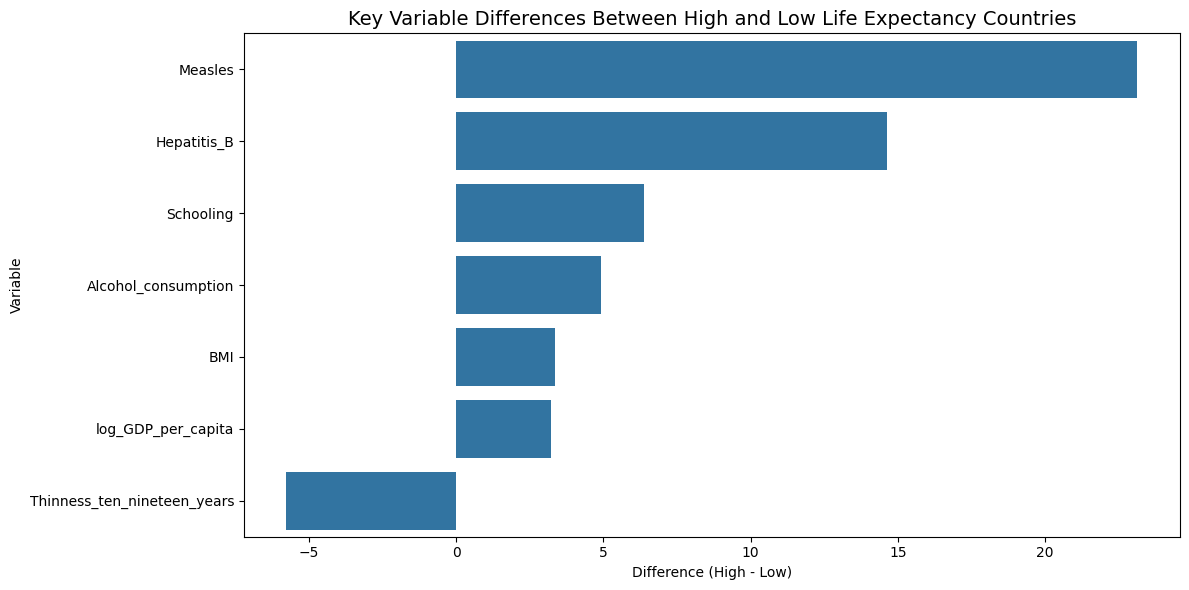

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Difference (High - Low)",
    y="Variable",
    data=comparison_df.sort_values(by="Difference (High - Low)", ascending=False)
)
plt.title("Key Variable Differences Between High and Low Life Expectancy Countries", fontsize=14)
plt.xlabel("Difference (High - Low)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

-예방접종률(Measles, Hepatitis_B), 교육(Schooling), 경제력(log_GDP_per_capita)은 기대수명이 높은 국가에서 높음

-저체중 청소년 비율은 기대수명이 낮은 국가에서 더 높음

-기대수명에 영향을 미칠 수 있는 지표: 보건·교육·영양 상태

## 2. 변수들이 일정 수준 이상에서 기대수명에 미치는 영향이 꺾이는 구간 찾기

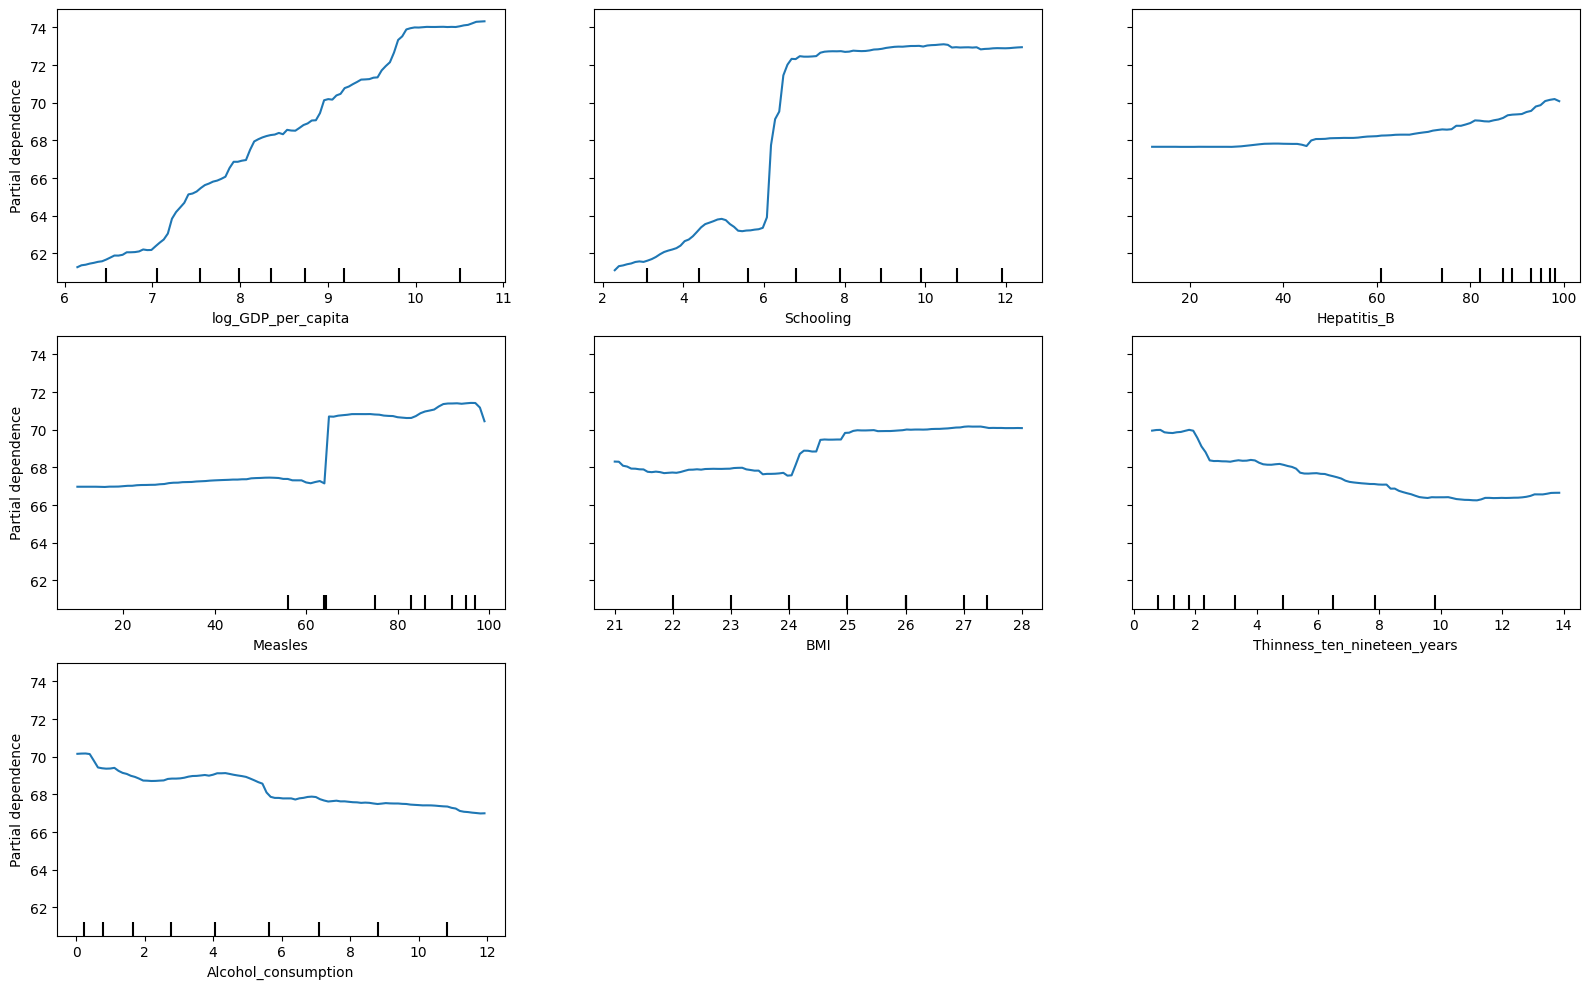

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# 의료/보건 지표의 기대수명에 대한 비선형 영향 확인 (Partial Dependence Plot)

# 사용할 피처와 타깃 정의
features = [
    "log_GDP_per_capita", "Schooling", "Hepatitis_B", "Measles",
    "BMI", "Thinness_ten_nineteen_years", "Alcohol_consumption"
]
target = "Life_expectancy"

# 데이터 불러오기
df_model = pd.read_csv('processed_life data_final.csv')

# 학습 데이터 분리
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 랜덤 포레스트 모델 훈련
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Partial Dependence Plot 생성
fig, ax = plt.subplots(figsize=(16, 10))
PartialDependenceDisplay.from_estimator(rf, X, features, ax=ax)
plt.tight_layout()
plt.show()

***1.log_GDP_per_capita*** \
GDP가 증가할수록 기대수명이 선형적으로 증가함\
→ 강한 양의 관계

***2.Schooling*** \
교육 연수가 약 6년 이상부터 기대수명이 급격히 증가 후 안정화\
→ 임계점 존재 (6년)

***3.Hepatitis_B*** \
예방접종률이 높을수록 기대수명이 천천히 상승\
→ 약한 양의 관계

***4.Measles*** \
홍역 예방접종률이 75%를 넘는 지점에서 기대수명이 급상승\
→ 비선형 양의 관계

***5.BMI*** \
24 부근에서 기대수명이 미세하게 증가 후 안정화\
→ 약한 관계

***6.Thinness_ten_nineteen_years*** \
청소년 저체중 비율이 높을수록 기대수명이 감소\
→ 음의 관계

***7.Alcohol_consumption*** \
음주량이 많아질수록 기대수명이 점진적으로 감소\
→ 약한 음의 관계

기대수명에 강한 영향을 주는 변수:

log_GDP_per_capita, Schooling, Measles, Hepatitis_B

특정 임계값 이상일 때 기대수명이 비약적으로 상승하는 패턴 존재 **(교육 6년, 홍역 예방접종 75%)**

저체중률과 음주량은 기대수명에 부정적 영향

## 교육수준 증가에 따른 기대수명 변화 (Counterfactual Prediction)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 사망률 관련 변수 제거
mortality_vars = ["Infant_deaths", "Under_five_deaths", "Adult_mortality", "log_Adult_mortality"]
remaining_features = [col for col in df.columns if col not in mortality_vars + ["Life_expectancy", "Country", "Region", "Year"]]

# 모델링 준비
df_clean = df[remaining_features + ["Life_expectancy"]].dropna()

X = df_clean[remaining_features]
y = df_clean["Life_expectancy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Counterfactual Analysis (반사실적 예측)__교육 수준을 2년 높였을 때 기대수명이 얼마나 증가하는가?

# 기본 모델: RandomForest
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

# Counterfactual 시나리오 생성: 'Schooling' 변수만 +2 증가
X_test_counterfactual = X_test.copy()
if "Schooling" in X_test_counterfactual.columns:
    X_test_counterfactual["Schooling"] = X_test_counterfactual["Schooling"] + 2

# 예측값 비교
original_preds = baseline_model.predict(X_test)
counterfactual_preds = baseline_model.predict(X_test_counterfactual)

# 기대수명 차이 계산
delta_life_expectancy = counterfactual_preds - original_preds

# 평균 변화량 및 분포
delta_summary = pd.DataFrame({
    "기대수명 변화량 (Schooling +2)": delta_life_expectancy
})

# 요약 통계
summary_stats = delta_summary.describe().T
display(summary_stats.round(2))

,count,mean,std,min,25%,50%,75%,max
기대수명 변화량 (Schooling +2),720.0,0.78,1.55,-2.03,0.05,0.31,0.92,11.37


**mean:** 교육연수 2년 증가 시 평균 기대수명 증가량 (+0.78년)\
**std:** 기대수명 변화량의 표준편차 → 국가 간 편차가 큼\
**min:** 일부 국가는 교육 연수 증가에도 기대수명이 오히려 감소한 경우가 있음\
**25%:** 하위 25% 국가는 교육 증가 효과가 거의 없음\
**50%:** 절반 이상의 국가는 약 0.31년 증가 수준\
**75%:** 상위 25% 국가는 약 1년 가까이 증가\
**max:** 특정 국가에서는 기대수명이 최대 11년 이상 증가한 경우도 있음


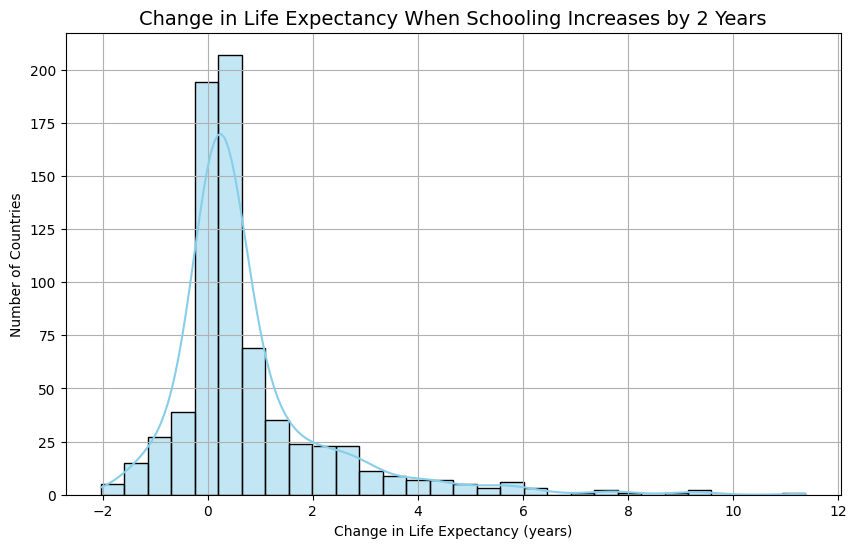

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(delta_life_expectancy, bins=30, kde=True, color='skyblue')
plt.title("Change in Life Expectancy When Schooling Increases by 2 Years", fontsize=14)
plt.xlabel("Change in Life Expectancy (years)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.show()

-교육 연수 2년 증가 시 기대수명은 대체로 소폭(0~1년) 증가

-국가별 편차가 매우 큼 → 어떤 국가는 교육 변화가 큰 영향을 미치고, 어떤 국가는 거의 영향이 없음

-정책적으로는 교육이 부족한 국가일수록 기대수명 향상 여지가 큼

### 기대수명 감소 국가 분석

In [ ]:
# 기대수명 감소한 케이스만 필터링
negative_impact_df = X_test.copy()
negative_impact_df["Original"] = original_preds
negative_impact_df["Schooling+2"] = counterfactual_preds
negative_impact_df["Delta"] = counterfactual_preds - original_preds

# 기대수명 감소 케이스만 추출
decreased_life_expectancy = negative_impact_df[negative_impact_df["Delta"] < 0]
display(decreased_life_expectancy.sort_values(by="Delta"))

,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,log_GDP_per_capita,log_Population_mln,Original,Schooling+2,Delta
2332,0.97,99.0,65.0,26.0,88.0,99.0,0.17,2178.0,0.56,1.2,1.2,5.2,0.0,1.0,7.686162,-0.579818,70.944,68.910,-2.034
1228,0.02,98.0,65.0,26.0,99.0,99.0,0.05,5302.0,75.54,8.0,8.2,9.5,0.0,1.0,8.575839,4.324662,74.589,72.801,-1.788
445,3.73,94.0,89.0,24.0,93.0,93.0,0.26,3070.0,0.51,6.9,6.9,5.6,0.0,1.0,8.029433,-0.673345,71.361,69.759,-1.602
221,9.05,91.0,89.0,28.0,91.0,91.0,0.31,16232.0,0.28,3.8,3.8,10.5,0.0,1.0,9.694740,-1.272966,78.158,76.569,-1.589
211,7.51,91.0,71.0,27.0,90.0,89.0,0.58,16197.0,0.27,4.1,4.1,9.1,0.0,1.0,9.692581,-1.309333,76.049,74.461,-1.588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,7.55,98.0,83.0,27.0,99.0,99.0,0.08,17796.0,10.97,0.8,0.7,10.4,1.0,0.0,9.786729,2.395164,80.012,79.998,-0.014
1292,7.48,96.0,83.0,26.0,96.0,97.0,0.07,31185.0,59.54,0.5,0.6,9.9,1.0,0.0,10.347692,4.086648,82.005,81.996,-0.009
1036,7.62,98.0,83.0,27.0,99.0,99.0,0.09,18124.0,11.05,0.8,0.7,10.3,1.0,0.0,9.804992,2.402430,80.396,80.387,-0.009
109,3.92,95.0,97.0,26.0,96.0,95.0,0.08,3407.0,2.90,2.1,2.1,11.4,0.0,1.0,8.133587,1.064711,73.769,73.765,-0.004


In [ ]:
# 주요 변수 비교
cols_to_check = ["Schooling", "Alcohol_consumption", "BMI", "Thinness_ten_nineteen_years", "log_GDP_per_capita"]
display(decreased_life_expectancy[cols_to_check].describe())

,Schooling,Alcohol_consumption,BMI,Thinness_ten_nineteen_years,log_GDP_per_capita
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,8.200000,4.480284,25.581560,4.600000,8.624913
std,2.320099,3.278660,1.585136,3.695847,0.983900
min,1.600000,0.000000,20.900000,0.500000,6.466145
25%,6.700000,1.590000,25.000000,2.000000,7.980024
50%,8.900000,4.110000,26.000000,3.400000,8.552174
75%,9.900000,6.320000,26.600000,6.300000,9.275098
max,14.000000,13.640000,29.000000,17.200000,11.027150


**기대수명이 감소한 국가들 공통점**

-이미 교육 수준이 평균 8.2년으로 높은 편, 교육을 더 늘려도 추가 효과가 크지 않음

-중상위 소득 국가 중심으로 이미 경제 수준이 꽤 높음\
**→이미 잘 사는 나라에서 교육만 늘린다고 기대수명이 무조건 증가하지 않음\
(다른 요인이 복합적으로 영향을 미침)**

## HIV 발병률 감소에 따른 기대수명 변화 (Counterfactual Prediction)

In [ ]:
# Counterfactual 시나리오 생성: 'Incidents_HIV' 변수만 -10 감소
X_test_counterfactual_hiv = X_test.copy()
if "Incidents_HIV" in X_test_counterfactual_hiv.columns:
    X_test_counterfactual_hiv["Incidents_HIV"] = X_test_counterfactual_hiv["Incidents_HIV"] - 10
    # 음수 값 방지 (HIV 발생률이 0 미만이 되지 않도록)
    X_test_counterfactual_hiv["Incidents_HIV"] = X_test_counterfactual_hiv["Incidents_HIV"].clip(lower=0)

# 예측값 비교
original_preds_hiv = baseline_model.predict(X_test)
counterfactual_preds_hiv = baseline_model.predict(X_test_counterfactual_hiv)

# 기대수명 차이 계산
delta_life_expectancy_hiv = counterfactual_preds_hiv - original_preds_hiv

# 결과 요약
delta_summary_hiv = pd.DataFrame({
    "기대수명 변화량 (Incidents_HIV -10)": delta_life_expectancy_hiv
})

# 요약 통계 출력
summary_stats_hiv = delta_summary_hiv.describe().T
display(summary_stats_hiv.round(2))

,count,mean,std,min,25%,50%,75%,max
기대수명 변화량 (Incidents_HIV -10),720.0,2.07,4.08,-2.32,0.0,0.26,1.46,20.12


**mean:** HIV 발생률을 10 줄였을 때, 기대수명이 평균 약 2.07년 증가함

**std:** 변화량의 표준편차가 크다 → 국가별 효과 차이가 큼

**min:** 일부 국가는 오히려 HIV 감소에도 기대수명이 감소한 경우도 있음

**25%:** 하위 25% 국가는 변화 없음

**50%:** 절반 이상의 국가는 기대수명이 0.26년 증가 수준

**75%:** 상위 25% 국가는 기대수명이 약 1.5년 증가

**max:** 특정 국가에서는 20년 이상 기대수명이 증가한 경우도 존재

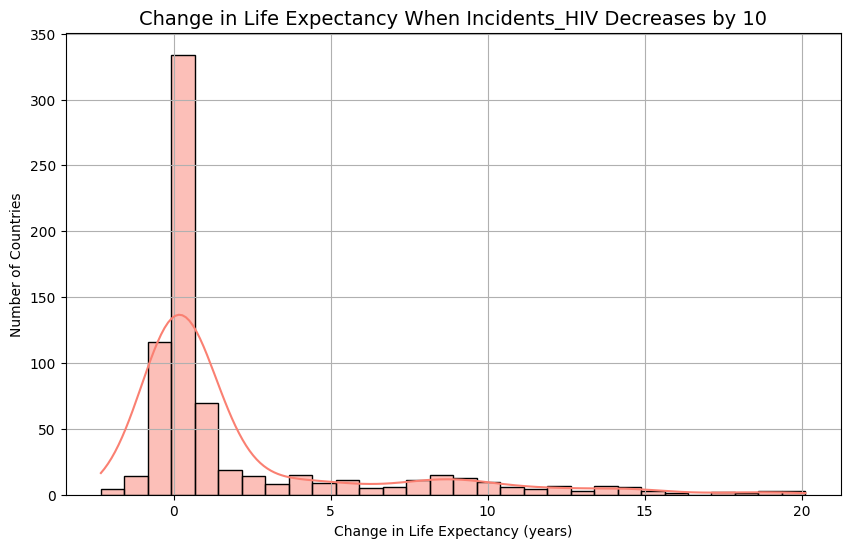

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(delta_life_expectancy_hiv, bins=30, kde=True, color='salmon')
plt.title("Change in Life Expectancy When Incidents_HIV Decreases by 10", fontsize=14)
plt.xlabel("Change in Life Expectancy (years)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.show()

-대부분 국가에서 기대수명이 증가

-평균 기대수명 증가량: 약 2년\
→ 교육 연수 2년 증가 시보다 훨씬 큰 효과를 보임\
(평균: 2.07년, 중앙값: 0.26년, 최대값: 20년 이상)

-편차가 매우 큼 (표준편차: 4.08)\
→ 일부 국가는 기대수명이 극적으로 증가했지만, 영향이 거의 없거나 오히려 감소한 국가도 존재\
→ 이는 HIV가 건강에 매우 치명적인 영향을 주는 국가일수록 정책 변화에 민감하게 반응한다는 뜻


-HIV 감염률이 높은 국가에서의 보건 개입(예: 예방, 진단, 치료 확대)은 기대수명 향상에 큰 기여 가능\
→ 특히 고위험 국가를 선별해 집중 개입할 경우, 기대수명 개선 효과가 클 것으로 예상됨

### 기대수명 감소 국가 분석

In [ ]:
# 기대수명 감소한 케이스 필터링 (Incidents_HIV 감소 시)
negative_impact_hiv_df = X_test.copy()
negative_impact_hiv_df["Original"] = original_preds_hiv
negative_impact_hiv_df["Incidents_HIV-10"] = counterfactual_preds_hiv
negative_impact_hiv_df["Delta"] = counterfactual_preds_hiv - original_preds_hiv

# 기대수명이 오히려 감소한 경우 추출
decreased_life_expectancy_hiv = negative_impact_hiv_df[negative_impact_hiv_df["Delta"] < 0]
display(decreased_life_expectancy_hiv.sort_values(by="Delta"))

,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,log_GDP_per_capita,log_Population_mln,Original,Incidents_HIV-10,Delta
941,11.73,74.0,75.0,25.0,99.0,99.0,0.10,36205.0,66.00,0.6,0.6,11.2,1.0,0.0,10.496953,4.189655,81.935,79.617,-2.318000e+00
940,12.22,78.0,72.0,25.0,99.0,99.0,0.10,36183.0,65.66,0.6,0.6,11.0,1.0,0.0,10.496345,4.184490,81.888,79.629,-2.259000e+00
942,12.07,83.0,77.0,25.0,98.0,98.0,0.10,36379.0,66.31,0.6,0.6,11.4,1.0,0.0,10.501747,4.194341,81.690,79.569,-2.121000e+00
937,12.66,51.0,67.0,25.0,98.0,98.0,0.10,35131.0,64.71,0.6,0.6,10.8,1.0,0.0,10.466839,4.169916,81.259,79.307,-1.952000e+00
1831,0.20,82.0,65.0,21.0,82.0,82.0,0.17,643.0,26.38,17.2,17.8,3.0,0.0,1.0,6.466145,3.272606,65.721,64.370,-1.351000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0.60,66.0,71.0,27.8,60.0,72.0,0.13,1773.0,21.08,6.3,6.1,6.3,0.0,1.0,7.480428,3.048325,69.011,69.008,-3.000000e-03
1413,6.52,97.0,65.0,25.0,98.0,98.0,0.10,821.0,5.16,3.4,3.4,10.2,0.0,1.0,6.710523,1.640937,68.300,68.297,-3.000000e-03
393,10.53,96.0,93.0,26.0,94.0,94.0,0.03,6289.0,7.44,2.0,2.1,10.6,1.0,0.0,8.746557,2.006871,73.574,73.572,-2.000000e-03
926,8.76,88.0,92.0,26.0,98.0,98.0,0.08,42711.0,5.46,0.9,0.8,12.4,1.0,0.0,10.662212,1.697449,80.798,80.796,-2.000000e-03


In [ ]:
# 주요 변수 목록 지정
cols_to_check = ["Schooling", "Alcohol_consumption", "BMI", "Thinness_ten_nineteen_years", "log_GDP_per_capita"]

# 기대수명이 감소한 케이스에서 주요 변수 분포 확인
display(decreased_life_expectancy_hiv[cols_to_check].describe())

,Schooling,Alcohol_consumption,BMI,Thinness_ten_nineteen_years,log_GDP_per_capita
count,179.000000,179.000000,179.000000,179.000000,179.000000
mean,8.778212,5.662514,24.999441,4.741899,8.899657
std,3.000286,4.397324,2.193747,5.604621,1.501300
min,2.300000,0.010000,20.000000,0.200000,6.139885
25%,6.100000,1.585000,24.000000,1.100000,7.547728
50%,9.800000,4.710000,25.000000,2.200000,9.050406
75%,11.200000,9.225000,26.000000,6.200000,10.357316
max,13.300000,17.290000,32.000000,27.100000,11.326572


**Schooling**\
평균 8.8년, 중앙값 9.8년 → 전반적으로 교육 수준은 낮지 않음

상위 25%는 11.2년 이상 → 교육 수준이 높은 국가도 포함


**BMI**\
평균 25.0, 중앙값 25.0 → 정상 범주 내

최소 20.0, 최대 32.0\
→ 체중 문제는 전반적으로 크지 않은 것으로 보임\
→ BMI는 기대수명 감소의 직접적 원인보다는 중립적일 가능성

**Thinness**\
평균 4.74%, 중앙값 2.2%

상위 25%는 6.2% 이상, 최대 27.1%\
→ 일부 국가는 청소년 영양 상태가 매우 나쁨\
→ 기대수명에 부정적인 영향을 줄 수 있는 요인

**log_GDP_per_capita**\
평균 8.90, 중앙값 9.05

최소 6.14, 최대 11.33\
→ 저소득 국가부터 고소득 국가까지 다양하게 분포\
→ 기대수명이 감소한 국가는 경제 수준이 반드시 낮지는 않음

 **기대수명이 감소한 국가는 단순히 “교육 수준이 낮거나 경제력이 부족한 국가”가 아닌,
다양한 특성을 가진 국가들로 구성되어 있음**

## 잔차 분석

In [ ]:
# 잔차(Residual) 분석

# 예측값 및 실제값 기반 잔차 계산
y_pred = baseline_model.predict(X_test)
residuals = y_test - y_pred

# 잔차 포함한 DataFrame 생성
residuals_df = X_test.copy()
residuals_df["Actual_Life_Expectancy"] = y_test
residuals_df["Predicted_Life_Expectancy"] = y_pred
residuals_df["Residual"] = residuals

# 실제 국가 정보 붙이기 (Country, Year 등)
residuals_df = residuals_df.merge(df[["Life_expectancy", "Country", "Year"]],
                                   left_on="Actual_Life_Expectancy",
                                   right_on="Life_expectancy", how="left")

# 잔차가 가장 큰 상위/하위 10개 관측치 추출
residual_outliers = residuals_df.sort_values(by="Residual", key=abs, ascending=False).head(10)

display(residual_outliers.round(2))

,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,...,Economy_status_Developed,Economy_status_Developing,log_GDP_per_capita,log_Population_mln,Actual_Life_Expectancy,Predicted_Life_Expectancy,Residual,Life_expectancy,Country,Year
1839,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Turkmenistan,2004.0
1838,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Sao Tome and Principe,2005.0
1837,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Pakistan,2008.0
1836,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Nepal,2004.0
1835,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Mongolia,2004.0
1834,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,"Micronesia, Fed. Sts.",2001.0
1833,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Madagascar,2013.0
1832,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Kiribati,2006.0
1830,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Cambodia,2007.0
1831,1.03,95.0,88.0,21.0,95.0,95.0,0.1,9011.0,0.35,8.4,...,0.0,1.0,9.11,-1.05,64.7,73.55,-8.85,64.7,Eritrea,2015.0


#추가 SHAP

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

df = pd.read_csv("/content/processed_life data_final.csv")

In [ ]:
# 타겟/피처 정의
target = "Life_expectancy"
exclude_cols = ["Country", "Region", target]
X = df.drop(columns=exclude_cols)
y = df[target]

# 학습 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# SHAP 분석 (TreeExplainer 사용)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

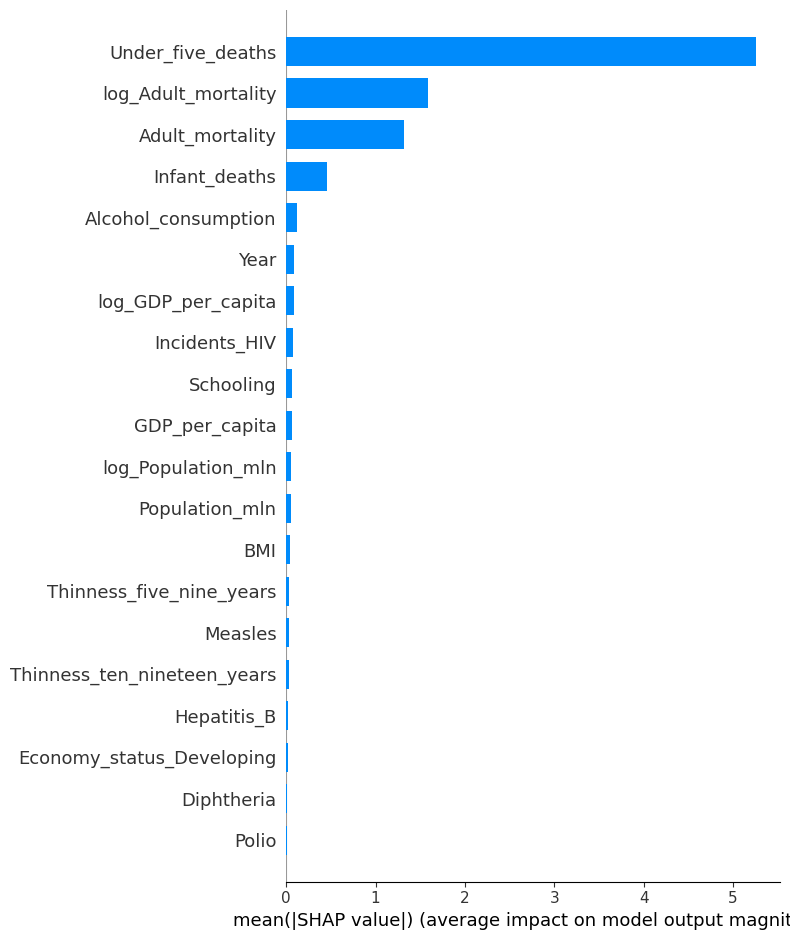

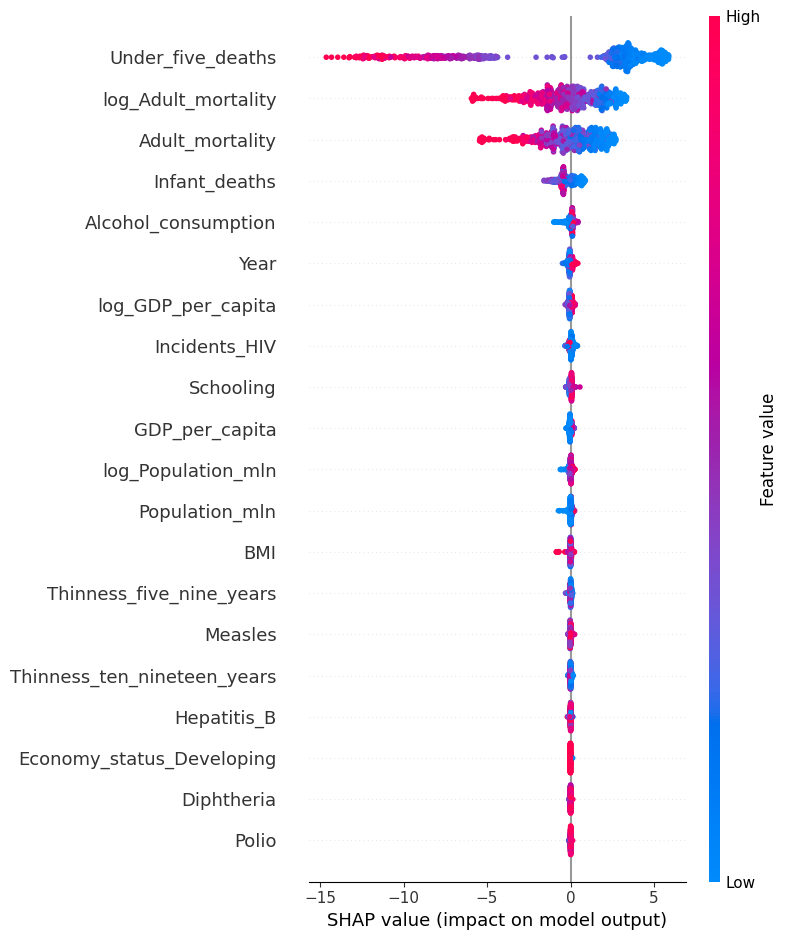

In [ ]:
# 중요도 그래프 출력
shap.summary_plot(shap_values, X_test, plot_type="bar")  # 중요도 순위만
shap.summary_plot(shap_values, X_test)  # 분포 + 영향 방향

# 사망률 제거 후

In [ ]:
# 타겟/피처 정의
target = "Life_expectancy"
exclude_cols = ["Country", "Region", "Infant_deaths", "Under_five_deaths", "Adult_mortality", "log_Adult_mortality", "GDP_per_capita", target]
X = df.drop(columns=exclude_cols)
y = df[target]

# 학습 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# SHAP 분석 (TreeExplainer 사용)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

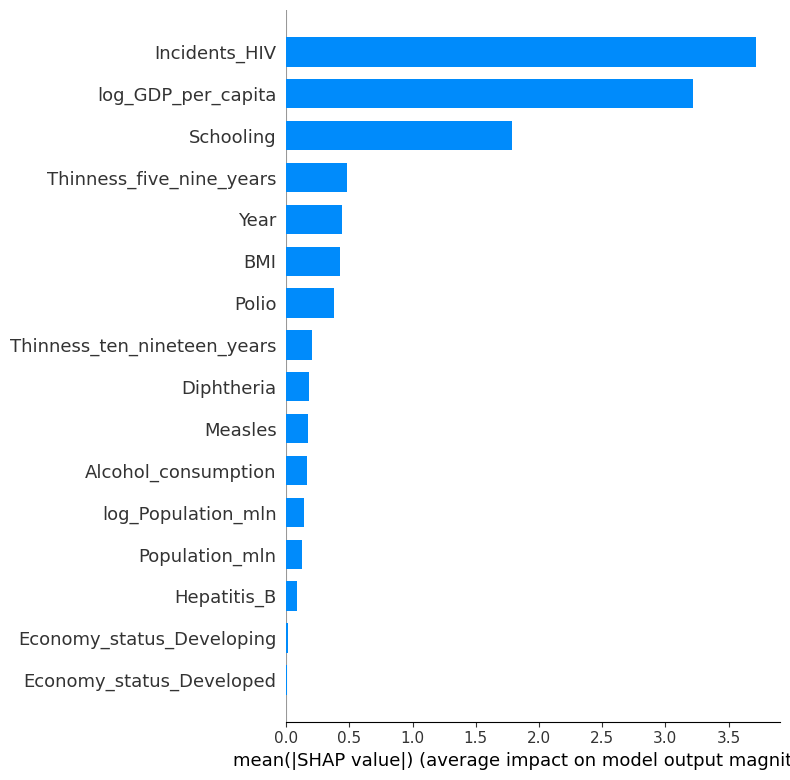

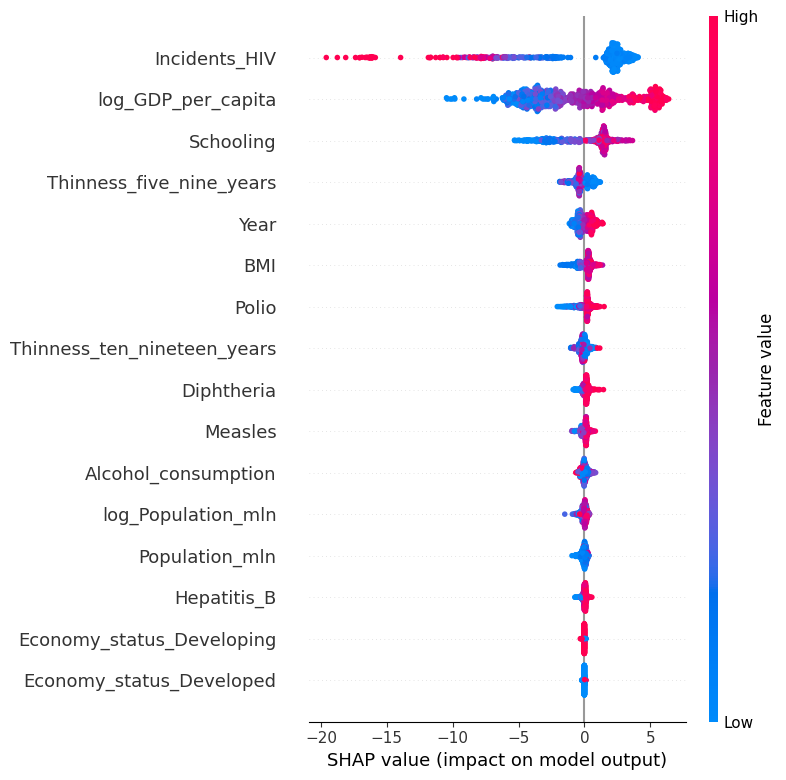

In [ ]:
# 중요도 그래프 출력
shap.summary_plot(shap_values, X_test, plot_type="bar")  # 중요도 순위만
shap.summary_plot(shap_values, X_test)  # 분포 + 영향 방향

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# 예측 수행
y_pred = model.predict(X_test)

# 성능 지표 계산
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 출력
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.9854
MAE: 0.7235
